In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
df= pd.read_csv('framingham.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.shape

(4238, 16)

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

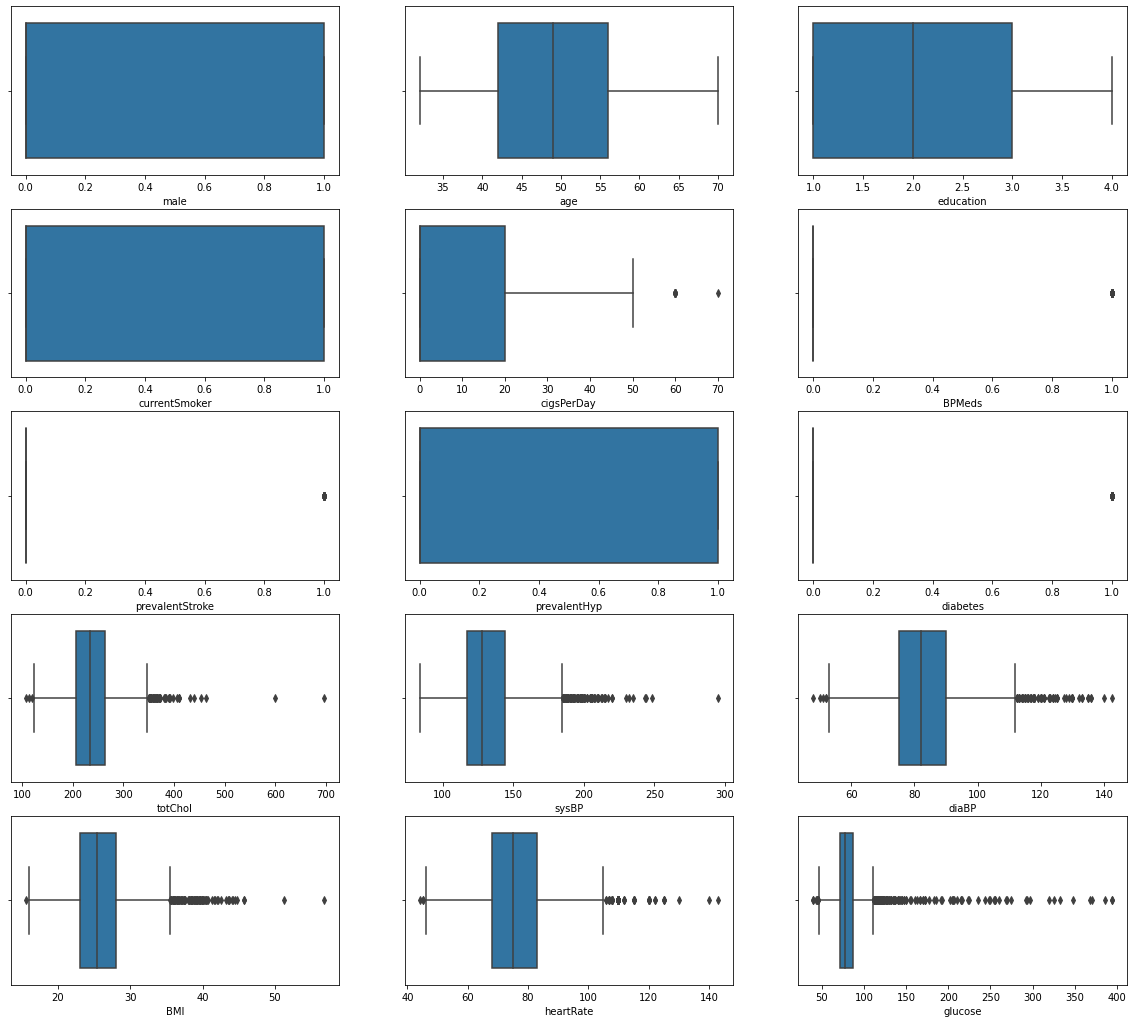

In [ ]:
plt.figure(figsize=(20,18))

plt.subplot(5,3,1)
sns.boxplot(x=df['male'], data=df)

plt.subplot(5,3,2)
sns.boxplot(x=df['age'], data=df)

plt.subplot(5,3,3)
sns.boxplot(x=df['education'], data=df)

plt.subplot(5,3,4)
sns.boxplot(x=df['currentSmoker'], data=df)

plt.subplot(5,3,5)
sns.boxplot(x=df['cigsPerDay'], data=df)

plt.subplot(5,3,6)
sns.boxplot(x=df['BPMeds'], data=df)

plt.subplot(5,3,7)
sns.boxplot(x=df['prevalentStroke'], data=df)

plt.subplot(5,3,8)
sns.boxplot(x=df['prevalentHyp'], data=df)

plt.subplot(5,3,9)
sns.boxplot(x=df['diabetes'], data=df)

plt.subplot(5,3,10)
sns.boxplot(x=df['totChol'], data=df)

plt.subplot(5,3,11)
sns.boxplot(x=df['sysBP'], data=df)

plt.subplot(5,3,12)
sns.boxplot(x=df['diaBP'], data=df)

plt.subplot(5,3,13)
sns.boxplot(x=df['BMI'], data=df)

plt.subplot(5,3,14)
sns.boxplot(x=df['heartRate'], data=df)

plt.subplot(5,3,15)
sns.boxplot(x=df['glucose'], data=df)

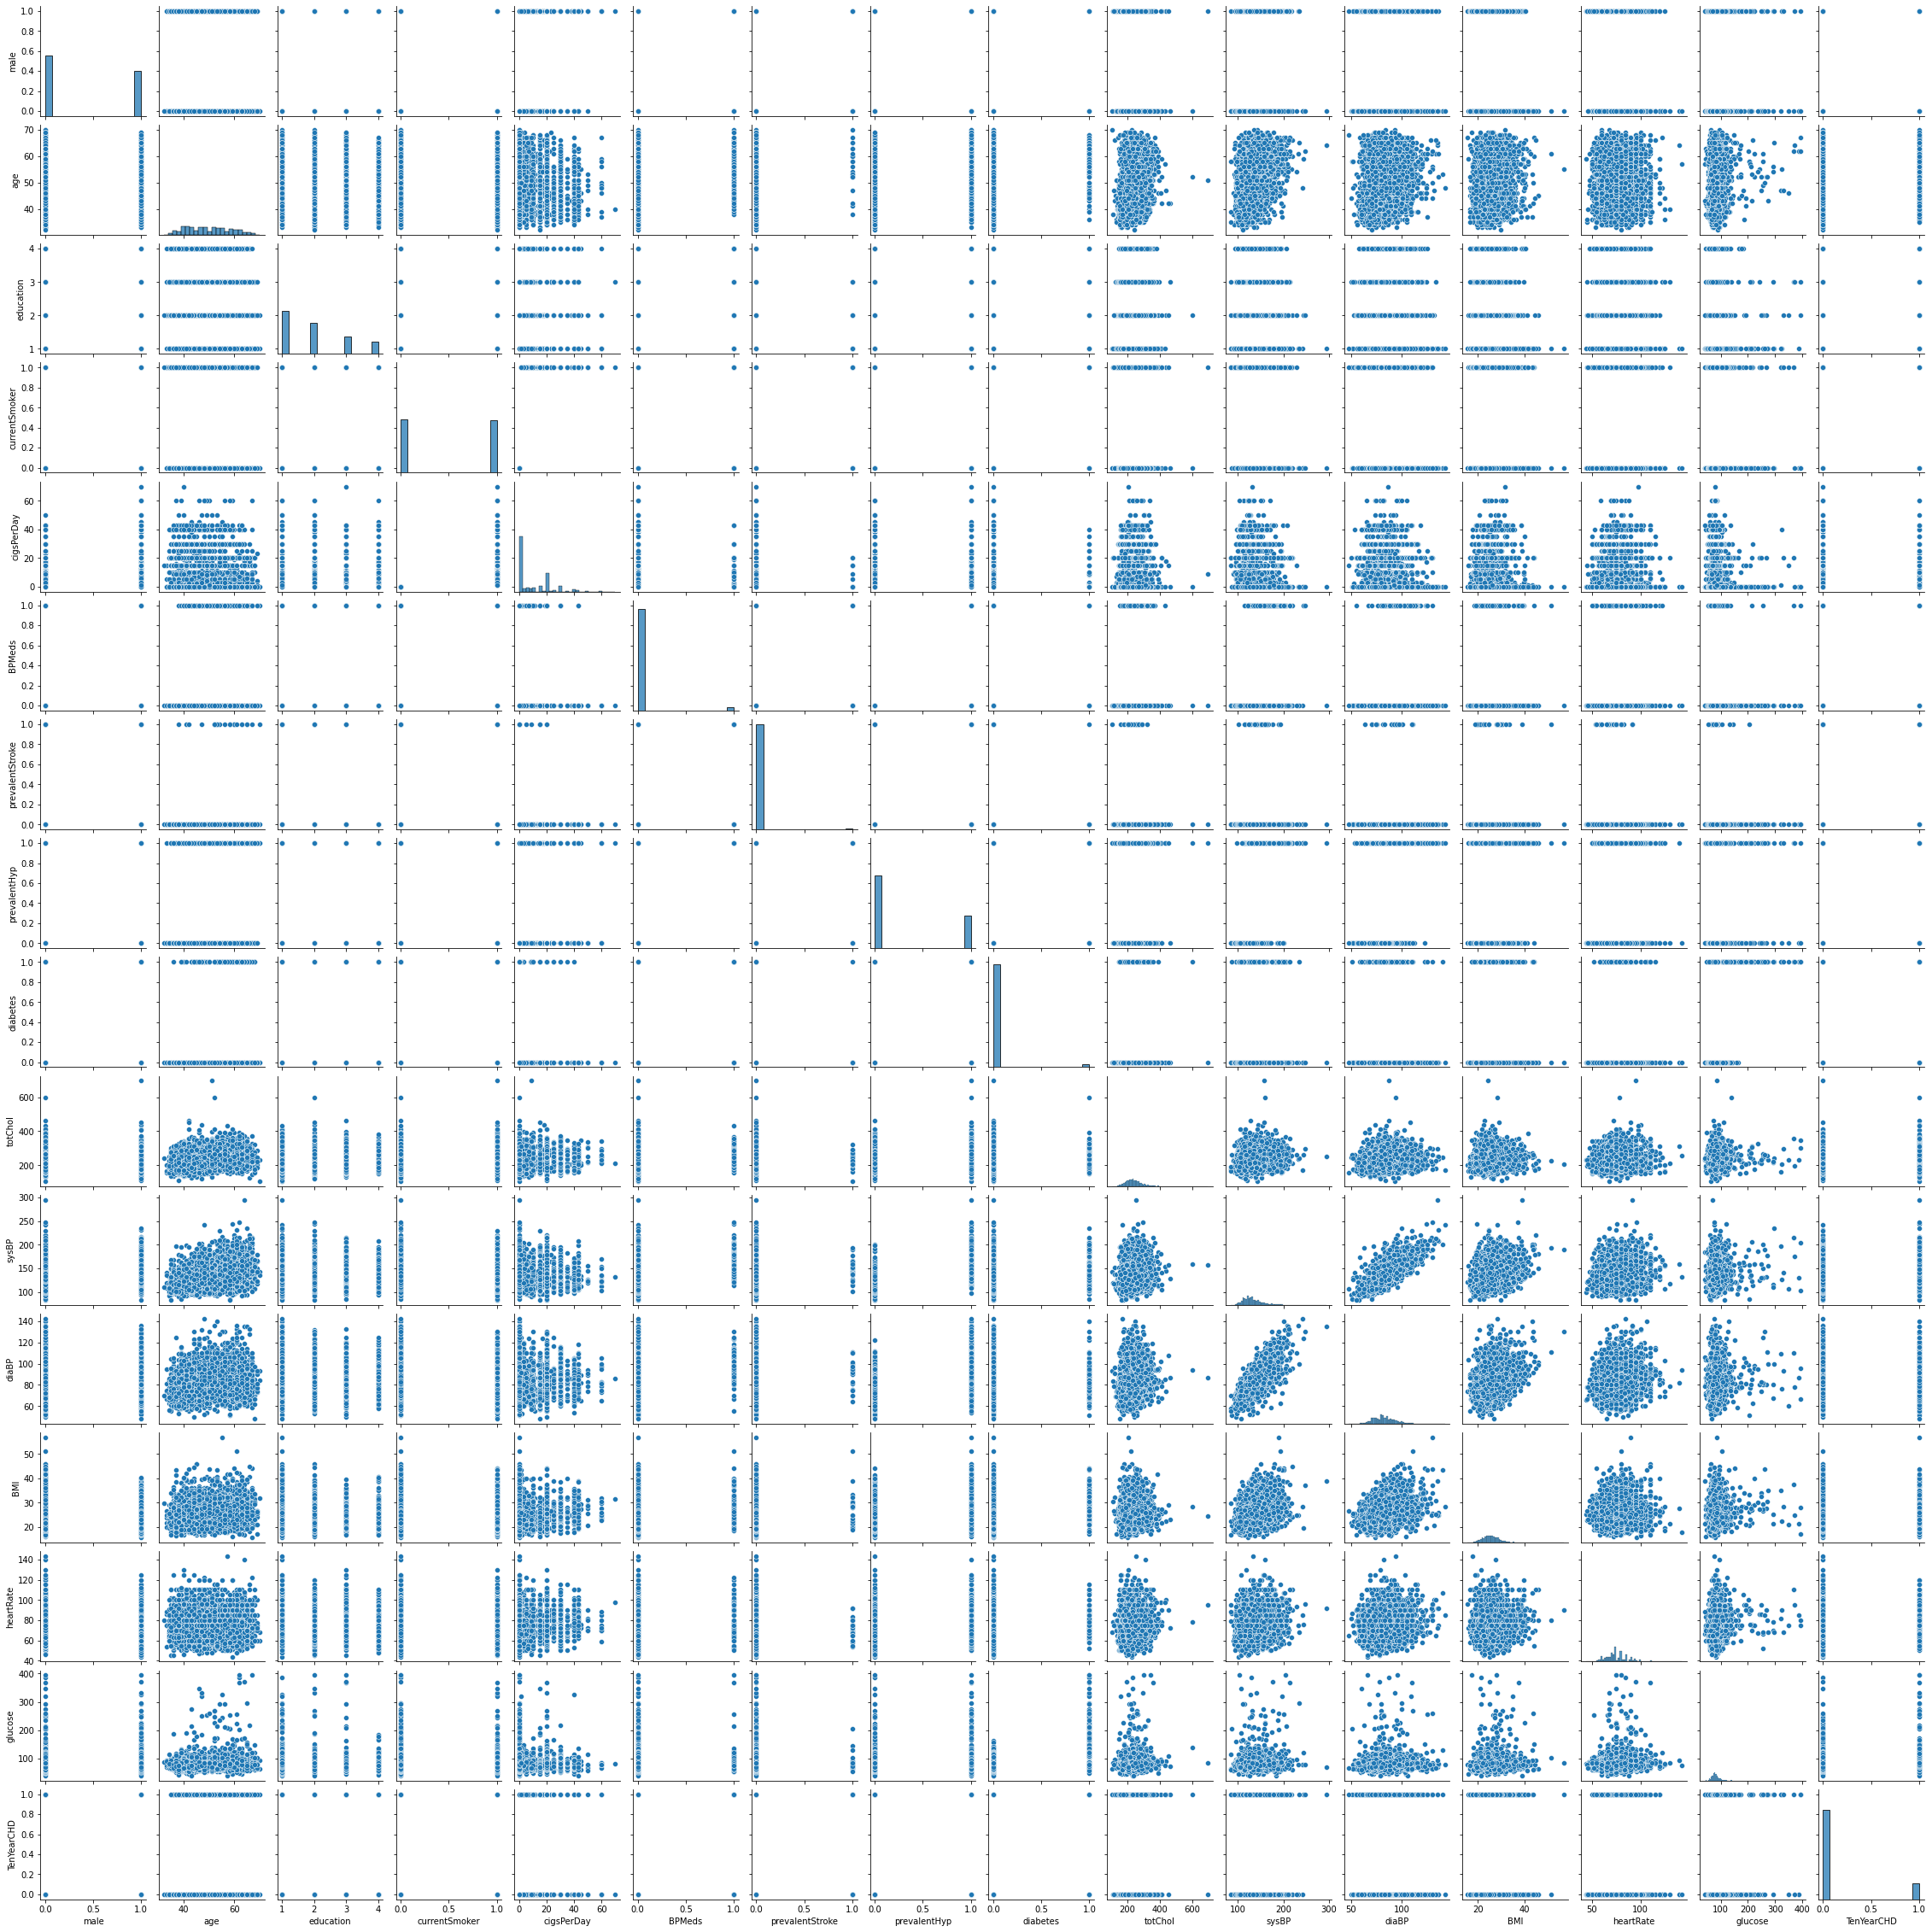

In [ ]:
sns.pairplot(df,height=2,kind='scatter')

In [ ]:
'''
Education
cigs per day : median
BPMeds:
totchol: median
BMI:median
glucose: median
'''

In [ ]:
for column in df:
  sns.displot(x=column,data=df)

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [ ]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(4080, 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


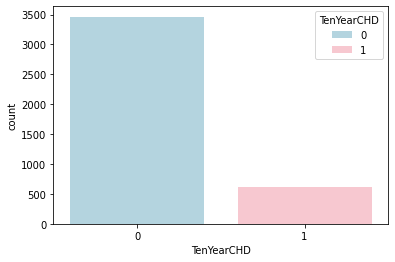

In [ ]:
new=sns.countplot(df['TenYearCHD'],hue=df['TenYearCHD'],palette=['lightblue','pink'],dodge=False)

In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
sns.countplot(df['TenYearCHD'],hue=df['TenYearCHD'],palette=['lightblue','pink'],dodge=False)

In [ ]:
print(sorted(Counter(df['TenYearCHD']).items()))

[(0, 3463), (1, 617)]


In [ ]:
co = df.corr()
co['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.226929
sysBP              0.218598
prevalentHyp       0.178793
diaBP              0.148156
glucose            0.118081
diabetes           0.096677
BPMeds             0.091551
male               0.087359
totChol            0.077358
BMI                0.074064
prevalentStroke    0.056992
cigsPerDay         0.056064
heartRate          0.021219
currentSmoker      0.018092
education         -0.054986
Name: TenYearCHD, dtype: float64

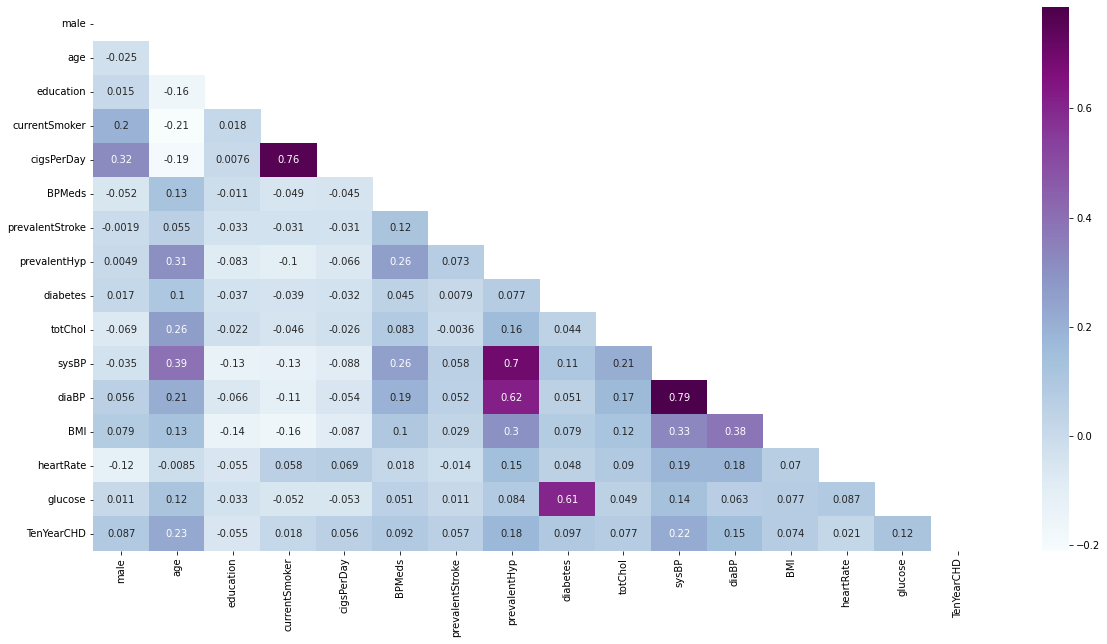

In [ ]:
plt.figure(figsize=(20,10))
lower=np.triu(co)
sns.heatmap(co, mask=lower, annot=True, cmap='BuPu' )

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
#Univariate
array=df.values
x=array[:,1:16]
y=array[:,0]

test=SelectKBest(score_func=f_classif, k=8)
fit=test.fit(x,y)

print(fit.scores_)
features=fit.transform(x)
print(features)

[2.47917578e+00 9.45726324e-01 1.66934367e+02 4.65684321e+02
 1.12008885e+01 1.53902925e-02 9.61120258e-02 1.15975147e+00
 1.94882240e+01 4.98032888e+00 1.28929667e+01 2.55970079e+01
 5.65322692e+01 5.05739682e-01 3.13612072e+01]
[[ 0.    0.    0.   ... 26.97 80.    0.  ]
 [ 0.    0.    0.   ... 28.73 95.    0.  ]
 [ 1.   20.    0.   ... 25.34 75.    0.  ]
 ...
 [ 1.   43.    0.   ... 19.71 65.    0.  ]
 [ 1.   15.    0.   ... 19.16 86.    0.  ]
 [ 0.    0.    0.   ... 21.47 80.    0.  ]]


In [ ]:
array=df.values
x=array[:,1:16]
y=array[:,0]
y=y.astype('int')
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=8)
fit=rfe.fit(x,y)

print('Number of features %d' % fit.n_features_)
print('Selected features %s' % fit.support_)
print('Rank of the F=features %s' %fit.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Number of features 8
Selected features [False  True  True  True  True False  True  True False False False  True
 False False  True]
Rank of the F=features [5 1 1 1 1 8 1 1 6 4 3 1 2 7 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
pca=PCA(n_components=5)
fit=pca.fit(x)

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)
print(selector.variances_)


#print('Explained features %s' %fit.explained_variance_ratio_)
#print(fit.components_)

[3.80000000e+01 1.03834102e+00 2.49980536e-01 7.00000000e+01
 2.87773332e-02 5.84775087e-03 2.13825452e-01 2.48404460e-02
 4.93000000e+02 2.11500000e+02 9.45000000e+01 1.65681936e+01
 9.90000000e+01 3.54000000e+02 1.28356341e-01]


In [ ]:
model=ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.11225959 0.0560841  0.03635397 0.08967224 0.00730817 0.00298404
 0.01335402 0.00663753 0.10789028 0.10761758 0.10442853 0.13168002
 0.11054225 0.09909727 0.01409042]


In [ ]:
x=df
y=df['TenYearCHD']

In [ ]:
x.drop('TenYearCHD',axis=1,inplace=True)

In [ ]:
ros=RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()))

[(0, 3463), (1, 3463)]


In [ ]:
df_1=x_resampled
df_1['TenYearCHD']=y_resampled
df_1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


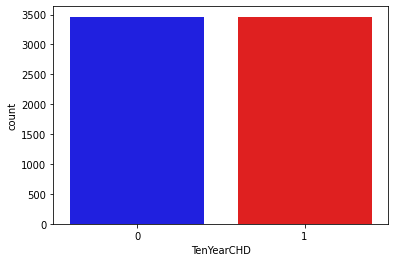

In [ ]:
sns.countplot(x=df_1['TenYearCHD'],palette=['blue','red'],dodge=False)

In [ ]:
df_uni=df_1[['education','currentSmoker','cigsPerDay','diabetes','sysBP','diaBP','BMI','glucose','TenYearCHD']]

In [ ]:
df_lr=df_1[['age','education','currentSmoker','cigsPerDay','prevalentStroke','prevalentHyp','diaBP','glucose','TenYearCHD']]

In [ ]:
df_pca=df_1[['male','currentSmoker','diabetes','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD']]

In [ ]:
df_etc=df_1[['male','currentSmoker','diabetes','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn

#Machine Learning: Univariate Selection

In [ ]:
array_uni =df_uni.values
X= array_uni[:,0:8]
y = array_uni[:,8]

In [ ]:
df_uni.isnull().sum()

education        0
currentSmoker    0
cigsPerDay       0
diabetes         0
sysBP            0
diaBP            0
BMI              0
glucose          0
TenYearCHD       0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_train)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.910529
1,2,0.886878
2,3,0.829507
3,4,0.798290
4,5,0.764060
5,6,0.737994
6,7,0.723868
7,8,0.702342
8,9,0.685199
9,10,0.675121


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[ 863  162]
 [  22 1031]]
Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      1025
         1.0       0.86      0.98      0.92      1053

    accuracy                           0.91      2078
   macro avg       0.92      0.91      0.91      2078
weighted avg       0.92      0.91      0.91      2078

Accuracy Score
0.9114533205004812


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.665 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.660 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   1.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.612 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [ ]:
'''
svm_model = SVC()
parameters=[{'C':[1,10,100,1000],
             'kernel':['linear']}]
svm_model.fit(X_train,y_train)
y_predict=svm_model.predict(X_test)
y_predict
...

array([0., 1., 0., ..., 1., 1., 1.])

In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[ 797  228]
 [  37 1016]]
0.8724735322425409
              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86      1025
         1.0       0.82      0.96      0.88      1053

    accuracy                           0.87      2078
   macro avg       0.89      0.87      0.87      2078
weighted avg       0.89      0.87      0.87      2078



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 1., 0., ..., 0., 0., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[912 113]
 [770 283]]
0.5750721847930702
              precision    recall  f1-score   support

         0.0       0.54      0.89      0.67      1025
         1.0       0.71      0.27      0.39      1053

    accuracy                           0.58      2078
   macro avg       0.63      0.58      0.53      2078
weighted avg       0.63      0.58      0.53      2078



#Machine Learning: Logistics Regression

In [ ]:
array_lr =df_lr.values
X1= array_lr[:,0:8]
y1 = array_lr[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.911056
1,2,0.887444
2,3,0.827621
3,4,0.800469
4,5,0.772607
5,6,0.734514
6,7,0.725072
7,8,0.708705
8,9,0.699867
9,13,0.689771


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[ 867  158]
 [  25 1028]]
Classification report
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90      1025
         1.0       0.87      0.98      0.92      1053

    accuracy                           0.91      2078
   macro avg       0.92      0.91      0.91      2078
weighted avg       0.92      0.91      0.91      2078

Accuracy Score
0.911934552454283


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[796 229]
 [ 82 971]]
0.8503368623676613
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      1025
         1.0       0.81      0.92      0.86      1053

    accuracy                           0.85      2078
   macro avg       0.86      0.85      0.85      2078
weighted avg       0.86      0.85      0.85      2078



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 0., 0., ..., 0., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[908 117]
 [736 317]]
0.5895091434071222
              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68      1025
         1.0       0.73      0.30      0.43      1053

    accuracy                           0.59      2078
   macro avg       0.64      0.59      0.55      2078
weighted avg       0.64      0.59      0.55      2078



#Machine Learning: PCA

In [ ]:
array_pca =df_pca.values
X2= array_pca[:,0:8]
y2 = array_pca[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.897769
1,2,0.879406
2,3,0.806554
3,4,0.781315
4,5,0.737037
5,6,0.723725
6,7,0.707545
7,8,0.700433
8,9,0.683393
9,10,0.674766


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[ 831  194]
 [  16 1037]]
Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      1025
         1.0       0.84      0.98      0.91      1053

    accuracy                           0.90      2078
   macro avg       0.91      0.90      0.90      2078
weighted avg       0.91      0.90      0.90      2078

Accuracy Score
0.8989412897016362


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   2.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[1025    0]
 [  22 1031]]
0.9894128970163619
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1025
         1.0       1.00      0.98      0.99      1053

    accuracy                           0.99      2078
   macro avg       0.99      0.99      0.99      2078
weighted avg       0.99      0.99      0.99      2078



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 1., 0., ..., 0., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[869 156]
 [691 362]]
0.5923965351299326
              precision    recall  f1-score   support

         0.0       0.56      0.85      0.67      1025
         1.0       0.70      0.34      0.46      1053

    accuracy                           0.59      2078
   macro avg       0.63      0.60      0.57      2078
weighted avg       0.63      0.59      0.57      2078



#Machine Learning: Decision Tree

In [ ]:
array_etc =df_etc.values
X3= array_etc[:,0:8]
y3 = array_etc[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.897769
1,2,0.879406
2,3,0.806554
3,4,0.781315
4,5,0.737037
5,6,0.723725
6,7,0.707545
7,8,0.700433
8,9,0.683393
9,10,0.674766


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[ 831  194]
 [  16 1037]]
Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      1025
         1.0       0.84      0.98      0.91      1053

    accuracy                           0.90      2078
   macro avg       0.91      0.90      0.90      2078
weighted avg       0.91      0.90      0.90      2078

Accuracy Score
0.8989412897016362


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[1025    0]
 [  22 1031]]
0.9894128970163619
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1025
         1.0       1.00      0.98      0.99      1053

    accuracy                           0.99      2078
   macro avg       0.99      0.99      0.99      2078
weighted avg       0.99      0.99      0.99      2078



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 1., 0., ..., 0., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[869 156]
 [691 362]]
0.5923965351299326
              precision    recall  f1-score   support

         0.0       0.56      0.85      0.67      1025
         1.0       0.70      0.34      0.46      1053

    accuracy                           0.59      2078
   macro avg       0.63      0.60      0.57      2078
weighted avg       0.63      0.59      0.57      2078



#Machine Learning: Original Datasets

In [ ]:
df_1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,1,44,3.0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
6922,0,68,3.0,1,20.0,0.0,0,1,0,258.0,158.0,94.0,31.64,80.0,84.0,1
6923,0,57,2.0,1,10.0,1.0,0,1,0,272.0,157.0,80.0,25.15,70.0,95.0,1
6924,0,63,1.0,1,3.0,0.0,0,1,0,267.0,156.5,92.5,27.10,60.0,79.0,1


In [ ]:
array_ori=df_1.values
X4= array_ori[:,0:15]
y4= array_ori[:,15]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.902634
1,2,0.884258
2,3,0.834717
3,4,0.806974
4,5,0.776946
5,6,0.758256
6,7,0.744501
7,8,0.739107
8,9,0.727381
9,12,0.721733


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[ 840  185]
 [  15 1038]]
Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      1025
         1.0       0.85      0.99      0.91      1053

    accuracy                           0.90      2078
   macro avg       0.92      0.90      0.90      2078
weighted avg       0.91      0.90      0.90      2078

Accuracy Score
0.9037536092396535


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   2.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   1.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   1.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   1.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   1.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[1025    0]
 [  22 1031]]
0.9894128970163619
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1025
         1.0       1.00      0.98      0.99      1053

    accuracy                           0.99      2078
   macro avg       0.99      0.99      0.99      2078
weighted avg       0.99      0.99      0.99      2078



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 1., 0., ..., 0., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[924 101]
 [754 299]]
0.5885466794995188
              precision    recall  f1-score   support

         0.0       0.55      0.90      0.68      1025
         1.0       0.75      0.28      0.41      1053

    accuracy                           0.59      2078
   macro avg       0.65      0.59      0.55      2078
weighted avg       0.65      0.59      0.55      2078

